In [1]:
#this is my first LSTM model and it took me a month
#I DID NOT SAY THESE WORDS
# I DO NOT PROMOTE THIS

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download("stopwords")
nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("punkt")
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/ML/python/data/labeled_data.csv',delimiter=',')
df.dtypes



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [2]:
df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [3]:
df.shape
df.drop(['Unnamed: 0','count'],axis=1,inplace=True)
df.duplicated().sum()
df['class'].value_counts()

df['sentiment'] = df['class'].map({0:'Hate_Speech',1:'offensive_language',
                                  2: 'Neither'})


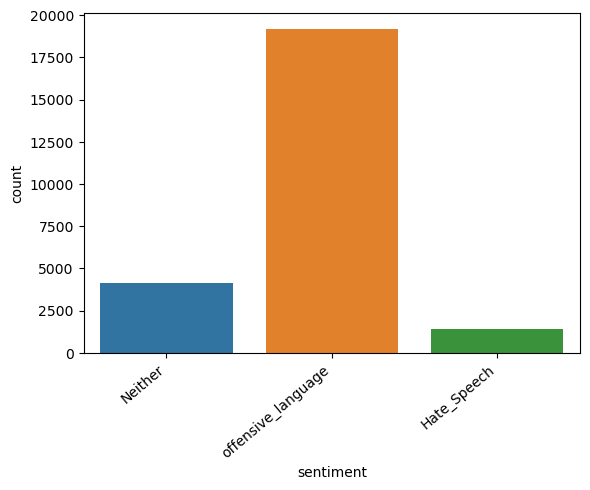

In [4]:
fig, axs = plt.subplots(figsize=(6,5)) 
sns.countplot(x='sentiment',data=df,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()

In [5]:
#making it so tweet is all lower-cased
df['tweet'] = df['tweet'].str.lower()



In [6]:
#removing html_tags
import re


def remove_html_tags(text):
    pattern = r'<.*?>' 
    text = re.sub(pattern, '', text)
    return text

df['tweet'] = df['tweet'].apply(remove_html_tags)
print(df['tweet'])

0        !!! rt @mayasolovely: as a woman you shouldn't...
1        !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3        !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4        !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object


In [7]:
#removing url tags
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)


df['tweet'] = df['tweet'].apply(remove_url)
print(df['tweet'])

0        !!! rt @mayasolovely: as a woman you shouldn't...
1        !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3        !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4        !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet, Length: 24783, dtype: object


In [8]:
#removing 'rt',punctuations and other noise
PUNC = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNC))

df['tweet'] = df['tweet'].apply(remove_punctuation)


df['tweet'] = df['tweet'].str.replace("rt","")
df['tweet'] = df['tweet'].str.replace("\d","")
df["tweet"] = df["tweet"].str.replace("[^\w\s]","")
print(df['tweet'])




0          mayasolovely as a woman you shouldnt complai...
1          mleew boy dats coldtyga dwn bad for cuffin d...
2          urkindofbrand dawg  sbabylife you ever fuck ...
3              cganderson vivabased she look like a tranny
4          shenikarobes the shit you hear about me migh...
                               ...                        
24778    yous a muthafin lie lifeasking pearls coreyema...
24779    youve gone and broke the wrong hea baby and dr...
24780    young buck wanna eat dat nigguh like i aint fu...
24781                youu got wild bitches tellin you lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object


In [9]:
#lemmatization of the tokenized tweets

lemma = WordNetLemmatizer()

def lemm_text(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)

df['tweet'] = df['tweet'].apply(lemm_text)
print(df['tweet'])

0        mayasolovely a a woman you shouldnt complain a...
1        mleew boy dat coldtyga dwn bad for cuffin dat ...
2        urkindofbrand dawg sbabylife you ever fuck a b...
3              cganderson vivabased she look like a tranny
4        shenikarobes the shit you hear about me might ...
                               ...                        
24778    yous a muthafin lie lifeasking pearl coreyeman...
24779    youve gone and broke the wrong hea baby and dr...
24780    young buck wan na eat dat nigguh like i aint f...
24781                   youu got wild bitch tellin you lie
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object


In [10]:
#I want to say: I DID NOT SAY THESE WORDS
#I AM NOT CELEBRATING THESE WORDS

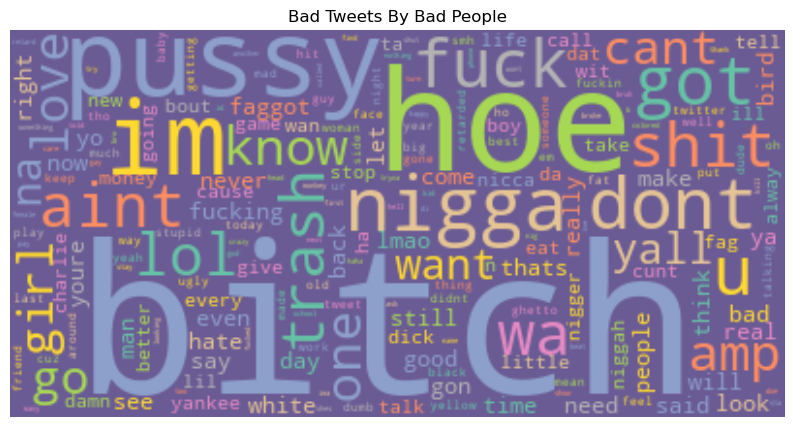

In [11]:
from textblob import TextBlob



text_ = " ".join(i for i in df.tweet)

hateblob = TextBlob(text_)

from wordcloud import WordCloud

text = " ".join(i for i in df.tweet)

wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bad Tweets By Bad People")
plt.show()


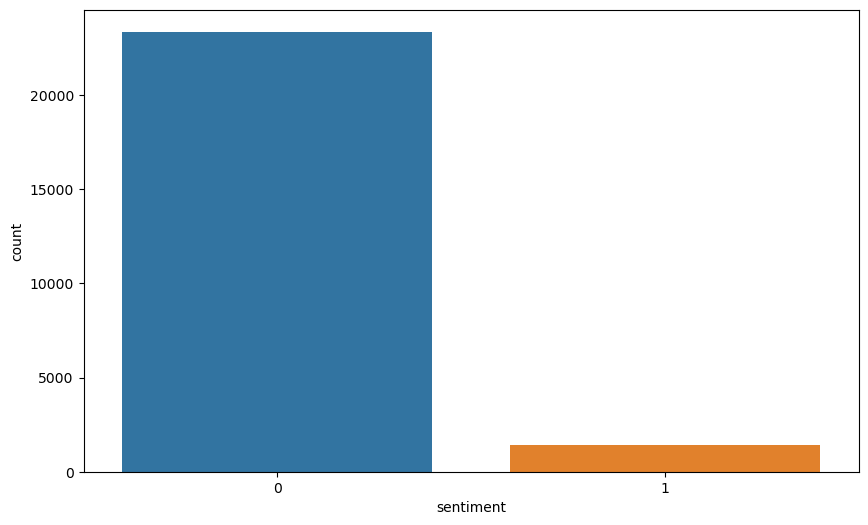

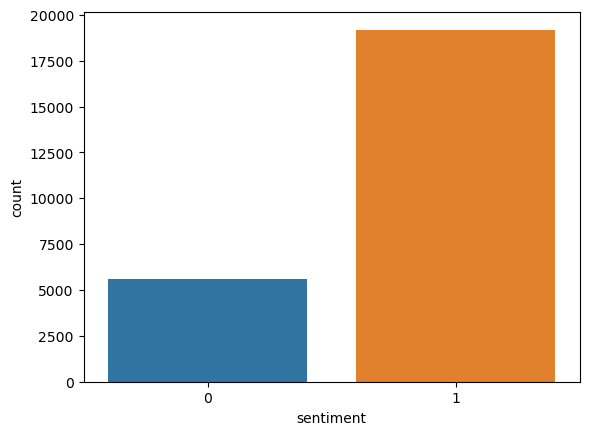

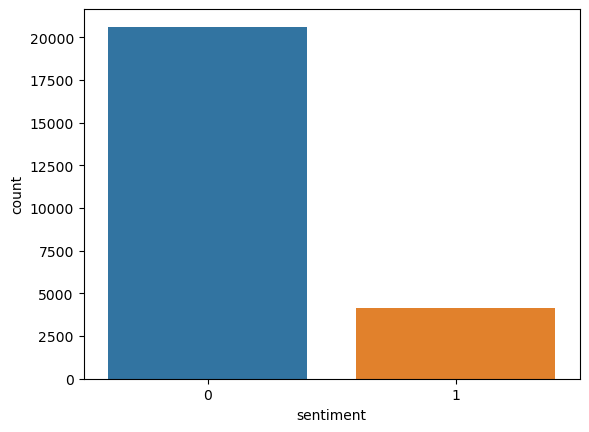

In [12]:
#ok, more uncessary hatred

Hate_tweet = (df['sentiment'] == "Hate_Speech").astype('int32')
Hate_tweet.describe()

offensive_tweets = (df['sentiment'] == "offensive_language").astype('int32')
offensive_tweets.describe()

neither = (df['sentiment'] == "Neither").astype('int32')
neither.value_counts()

plt.figure(figsize=(10,6))
sns.countplot(x=Hate_tweet)
plt.xticks()
plt.show()

sns.countplot(x=offensive_tweets)
plt.show()

sns.countplot(x=neither)
plt.show()


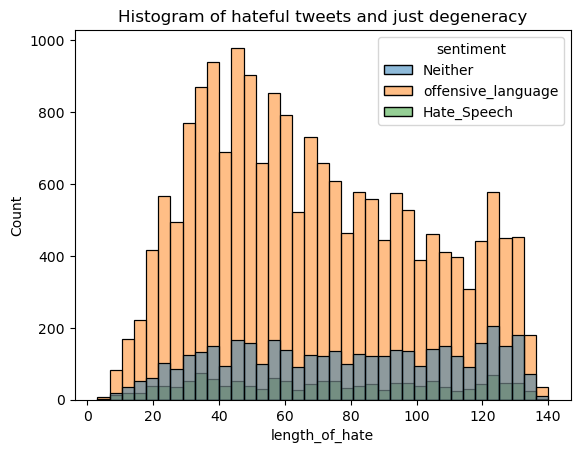

In [13]:
#length of tweets


df['length_of_hate'] = df['tweet'].apply(len)

sns.histplot(x='length_of_hate',hue='sentiment',data=df)
plt.title('Histogram of hateful tweets and just degeneracy')
plt.show()

In [14]:
#using hate speech as the target variable
from sklearn.model_selection import train_test_split

X = df['tweet']
y = df['hate_speech']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)


In [15]:
#importing library to make the LSTM model

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import LSTM,Embedding, Dense


num_words = 0


token = Tokenizer(num_words=num_words)
token.fit_on_texts(X_train)

word_index = token.word_index

X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)


In [16]:
X_train[0]

[22, 760, 133, 77, 1, 183, 810, 72, 1273, 30, 11, 4]

In [17]:
max_len = max([len(x) for x in X_train])
from keras.utils import pad_sequences

X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)

In [18]:
#RNN model for LSTM
RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1,output_dim=max_len,input_length=max_len))
RNN.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
RNN.add(Dense(1, activation='sigmoid'))
RNN.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

batch_size = 64

history = RNN.fit(X_train, y_train, epochs=10, batch_size=batch_size,validation_data=(X_test,y_test))


Epoch 1/10
310/310 [==============================] - 31s 83ms/step - loss: 0.4600 - accuracy: 0.7933 - val_loss: 0.2600 - val_accuracy: 0.7773
Epoch 2/10
310/310 [==============================] - 23s 75ms/step - loss: -0.1411 - accuracy: 0.7971 - val_loss: 0.1798 - val_accuracy: 0.7870
Epoch 3/10
310/310 [==============================] - 24s 77ms/step - loss: -1.0666 - accuracy: 0.8097 - val_loss: -0.1796 - val_accuracy: 0.7670
Epoch 4/10
310/310 [==============================] - 23s 74ms/step - loss: -2.3333 - accuracy: 0.8182 - val_loss: -0.2760 - val_accuracy: 0.7789
Epoch 5/10
310/310 [==============================] - 26s 82ms/step - loss: -3.5911 - accuracy: 0.8248 - val_loss: 0.1502 - val_accuracy: 0.7521
Epoch 6/10
310/310 [==============================] - 25s 79ms/step - loss: -4.8204 - accuracy: 0.8299 - val_loss: -0.1270 - val_accuracy: 0.7724
Epoch 7/10
310/310 [==============================] - 24s 77ms/step - loss: -6.1762 - accuracy: 0.8397 - val_loss: 0.3634 - val_

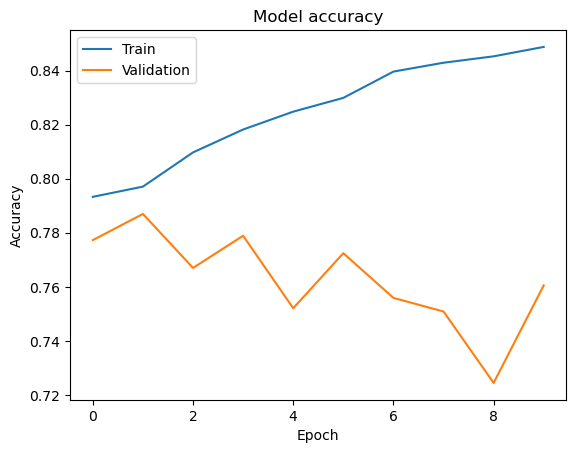

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
